In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"]='0'
import torch
import sys
sys.path.append('../')
from network.networks import Generator

In [2]:
from data.data_loader import PUNET_Dataset
dataset=PUNET_Dataset()

../data/data_loader.py:19: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  h5_file = h5py.File(h5_file_path)


In [9]:
from option.train_option import get_train_options
params=get_train_options()
G=Generator(params)
w_dir="../checkpoints/emd_loss_only/G_iter_5000.pth"
model_w=torch.load(w_dir)
G.load_state_dict(model_w)
G=G.cuda()

In [23]:
import numpy as np
pcd_input,gt,radius=dataset.__getitem__(0)
pcd_input=torch.tensor(pcd_input[np.newaxis,:,0:3]).permute(0,2,1).float().cuda()
output=G(pcd_input)

In [24]:
print(torch.min(pcd_input))
print(torch.max(pcd_input))
print(np.min(gt))
print(np.max(gt))

tensor(-6.6062, device='cuda:0')
tensor(3.6726, device='cuda:0')
-0.96503156
0.99995536


In [42]:
pcd_input,gt,radius=dataset.__getitem__(12)
print(np.min(pcd_input),np.max(pcd_input))
print(np.min(gt),np.max(gt))
print(np.mean(pcd_input),np.mean(gt))
import open3d as o3d

def visualize_point_cloud(xyz):
    '''
    Args:
        xyz is of shape N,3
    '''
    pcd=o3d.geometry.PointCloud()
    pcd.points=o3d.utility.Vector3dVector(xyz)
    vis=o3d.visualization.Visualizer()

    vis.create_window()
    vis.add_geometry(pcd)
    img=vis.capture_screen_float_buffer(True)

    return img

-7.3541284 6.2024474
-1.2496822 0.99738675
-0.30010557 -0.08949264


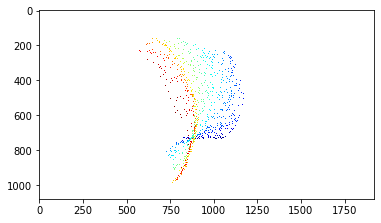

In [43]:
img=visualize_point_cloud(pcd_input[:,0:3])
import matplotlib.pyplot as plt
plt.imshow(img)

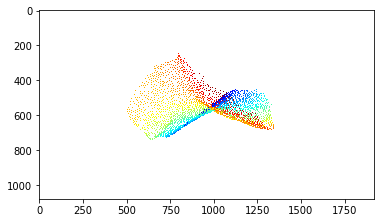

In [44]:
gt_img=visualize_point_cloud(gt[:,0:3])
plt.imshow(gt_img)